In [13]:
#!pip install tensorflow

import pandas as pd
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Activation, Dense
import matplotlib.pyplot as plt

In [14]:
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

df = pd.DataFrame({
    "x": [-1, 0, 1, 2, 3, 4],
    "y" : [-3, -1, 1, 3, 5, 7]
})
df

,x,y
0,-1,-3
1,0,-1
2,1,1
3,2,3
4,3,5
5,4,7


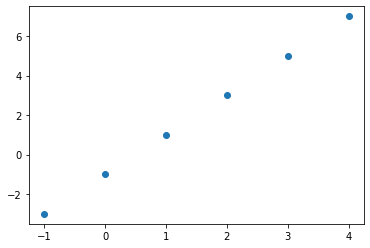

In [15]:
plt.scatter(x, y)
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu, input_shape=[1]),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ],name ='staright_line_model')

model.summary()

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(0.0099)

model.compile(loss='mean_squared_error', optimizer=optimizer)

model.fit(x, y, epochs=500, verbose=1)

In [ ]:
print(model.predict([-1]))

In [ ]:
print(model.predict([-1, 0, 1, 2, 3, 4]))

In [ ]:
predicted_y = model.predict(x)
print(predicted_y)

In [ ]:
import numpy as np
y_pred_round = []
for i in predicted_y:
  y_pred_round.append(np.round(i))

from sklearn.metrics import confusion_matrix as cm
print(cm(y, y_pred_round))

In [ ]:
model.predict([-1])[0][0]

In [ ]:
import seaborn as sns
predicted_df = pd.DataFrame({
    "x" : x,
    "y" : y
})
sns.scatterplot(x='x', y='y', data=predicted_df)
sns.histplot

In [ ]:
plt.scatter(x, y)
plt.plot(x, predicted_y, color='red')
plt.show()

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
!pip install ml_metadata
import ml_metadata as mlmd
from ml_metadata.metadata_store import metadata_store
from ml_metadata.proto import metadata_store_pb2

In [ ]:
connection_config = metadata_store_pb2.ConnectionConfig()
connection_config.fake_database.SetInParent() # Sets an empty fake database proto.
store = metadata_store.MetadataStore(connection_config)

In [ ]:
# Create ArtifactTypes, e.g., Data and Model
data_type = metadata_store_pb2.ArtifactType()
data_type.name = "DataSet"
data_type.properties["day"] = metadata_store_pb2.INT
data_type.properties["split"] = metadata_store_pb2.STRING
data_type_id = store.put_artifact_type(data_type)

model_type = metadata_store_pb2.ArtifactType()
model_type.name = "SavedModel"
model_type.properties["version"] = metadata_store_pb2.INT
model_type.properties["name"] = metadata_store_pb2.STRING
model_type_id = store.put_artifact_type(model_type)

# Query all registered Artifact types.
artifact_types = store.get_artifact_types()
artifact_types